In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#HW1

#Creating our random Graph

In [0]:
!sudo apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt



#Loading the Graph

In [0]:
import pickle

with open ('/content/drive/My Drive/graphPickle', 'rb') as fp:
    playersGraph = pickle.load(fp)

#Drawing the Graph

In [0]:
import pygraphviz as pgv

A= nx.nx_agraph.to_agraph(playersGraph)
A.write('/content/drive/My Drive/simple.dot') # write to simple.dot

B=pgv.AGraph('/content/drive/My Drive/simple.dot') # create a new graph from file
B.layout() # layout with default (neato)
B.draw("/content/drive/My Drive/a.png") # draw png
print("Wrote a.png")

Wrote a.png


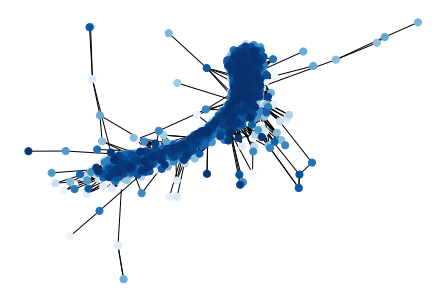

In [0]:
import matplotlib.pyplot as plt


Gmax= max(nx.connected_component_subgraphs(G), key=len)
pos = nx.spring_layout(Gmax, iterations=50)
nx.draw(Gmax, pos, node_color=range(4800), node_size=50, cmap=plt.cm.Blues)
plt.show()

# Metrics of the network


In [0]:
import operator

G= playersGraph
nNodes= nx.number_of_nodes(G)
nEdges= nx.number_of_edges(G)
degrees= nx.degree_histogram(G)
avg_degree= nEdges*2/nNodes

print("Number of Nodes: ",nNodes)
print("Number of Edges: ",nEdges)
print("Degrees: ", degrees)
print("Avg degree: ", avg_degree)

#Density
density= avg_degree/(nNodes-1)
print("Density: " ,round(density,4))

#Components
print("Connected components: ",len(list(nx.connected_component_subgraphs(G))))

#Largest component
Gmax= max(nx.connected_component_subgraphs(G), key=len)
print("Largest component size: ",nx.number_of_nodes(Gmax))

Number of Nodes:  4805
Number of Edges:  371611
Degrees:  [0, 19, 24, 16, 10, 2, 8, 13, 12, 8, 6, 8, 12, 15, 8, 10, 12, 9, 9, 7, 11, 13, 12, 12, 13, 9, 14, 9, 15, 14, 15, 14, 19, 12, 15, 24, 22, 25, 23, 19, 20, 18, 24, 28, 16, 27, 23, 18, 25, 24, 32, 24, 23, 24, 21, 35, 34, 30, 32, 28, 22, 13, 38, 35, 19, 35, 26, 26, 31, 29, 29, 28, 32, 21, 35, 29, 28, 19, 22, 33, 36, 24, 35, 27, 19, 33, 19, 25, 20, 28, 25, 27, 30, 27, 27, 17, 16, 19, 26, 26, 22, 32, 32, 26, 24, 14, 15, 21, 25, 17, 16, 17, 21, 10, 19, 19, 15, 21, 21, 16, 16, 11, 15, 16, 14, 13, 16, 16, 24, 12, 20, 17, 15, 15, 17, 16, 13, 7, 17, 5, 17, 11, 14, 12, 11, 8, 12, 14, 19, 17, 19, 16, 16, 7, 6, 12, 8, 10, 8, 5, 13, 14, 9, 15, 10, 14, 13, 9, 11, 12, 11, 8, 8, 13, 4, 9, 7, 8, 14, 2, 9, 17, 13, 10, 16, 15, 11, 7, 9, 7, 5, 11, 8, 13, 5, 10, 13, 10, 9, 5, 6, 8, 6, 15, 4, 17, 6, 16, 9, 13, 7, 8, 6, 10, 7, 6, 4, 7, 5, 12, 5, 5, 10, 5, 11, 12, 6, 4, 7, 8, 12, 10, 8, 6, 8, 11, 10, 6, 7, 14, 14, 5, 7, 3, 14, 6, 3, 2, 8, 5, 8, 8, 5, 6, 4

In [0]:
#Average shortest Path
i=0
for g in nx.connected_component_subgraphs(G):
  i+=1
  print("Avg shortest path for component "+str(i)+ " with " + str(nx.number_of_nodes(g))+" nodes: ", round(nx.average_shortest_path_length(g),4))


Avg shortest path for component 1 with 4800 nodes:  3.0397
Avg shortest path for component 2 with 3 nodes:  1.3333
Avg shortest path for component 3 with 2 nodes:  1.0


In [0]:
#Diameter of largest component
diameter=nx.diameter(Gmax)
print("Diameter(longest shortest path): ",diameter)

Diameter(longest shortest path):  11


In [0]:
#Average clustering coefficient
avg_clust_coef= nx.average_clustering(Gmax)
print("Average clustering coefficient: ",  round(avg_clust_coef,4))


Average clustering coefficient:  0.3879


In [0]:
#Betweenness 
nodes_betweenness_dict= nx.betweenness_centrality(G)
best_bet_node= max(nodes_betweenness_dict.items(), key=operator.itemgetter(1))
print("Node with best betweenness: " + str(best_bet_node[0]) + ", and betweenness of: "+str(best_bet_node[1]))


Node with best betweenness: Franco Superchi, and betweenness of: 0.014195699378324614


In [0]:
#Closeness
nodes_closeness_dict= nx.closeness_centrality(G)
best_clo_node=max(nodes_closeness_dict.items(), key=operator.itemgetter(1))
print("Node with best closeness: " + str(best_clo_node[0]) + ", and closeness of: "+str(best_clo_node[1]))

Node with best closeness: Francesco Antonioli, and closeness of: 0.4302643335125354


In [0]:
with open('/content/drive/My Drive/betweeness_pickle', 'wb') as fp:
    pickle.dump(nodes_betweenness_dict, fp)
    
with open('/content/drive/My Drive/closeness_pickle', 'wb') as fp:
    pickle.dump(nodes_closeness_dict, fp)

In [0]:
with open ('/content/drive/My Drive/betweeness_pickle', 'rb') as fp:
    nodes_betweenness_dict = pickle.load(fp)

with open ('/content/drive/My Drive/closeness_pickle', 'rb') as fp:
    nodes_closeness_dict = pickle.load(fp)

<function matplotlib.pyplot.show>

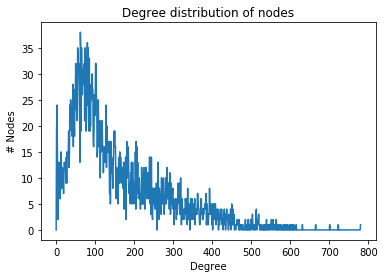

In [0]:
x= range(len(degrees))
y= degrees

plt.plot(x,y)
plt.title("Degree distribution of nodes")
plt.xlabel("Degree")
plt.ylabel("# Nodes")
plt.show

<function matplotlib.pyplot.show>

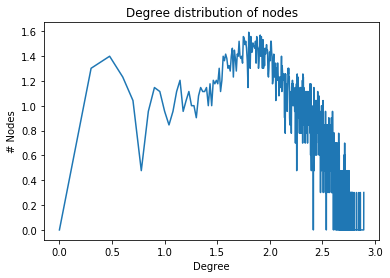

In [0]:
import math
x= range(len(degrees))
y= degrees
x=[math.log(item+1,10) for item in x]
y=[math.log(item+1,10) for item in y]

plt.plot(x,y)
plt.title("Degree distribution of nodes")
plt.xlabel("Degree")
plt.ylabel("# Nodes")
plt.show

#HW2 Network Robustness

In [0]:
import random
import math
from operator import itemgetter
original_giant_size=nx.number_of_nodes(Gmax)
number_nodes=G.number_of_nodes()

##Random Failures

In [0]:
relative_sizes=[]
f_values=[]
n=100
for i in range(n):
  f=(1/n)*i
  G2=G.copy()  
  sample = math.floor(f*number_nodes)  
  randomSample = random.sample(G2.nodes(), sample)
  G2.remove_nodes_from(randomSample)  
  G2max= max(nx.connected_component_subgraphs(G2), key=len)
  relative_new_giant_size= nx.number_of_nodes(G2max)/original_giant_size
  relative_sizes.append(relative_new_giant_size)
  f_values.append(f)


<function matplotlib.pyplot.show>

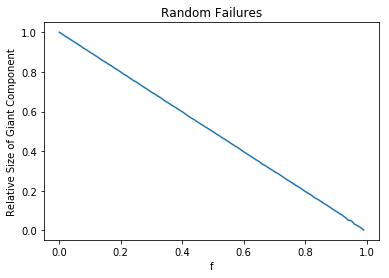

In [0]:
x1= f_values
y1= relative_sizes
plt.plot(x1,y1)
plt.title("Random Failures")
plt.xlabel("f")
plt.ylabel("Relative Size of Giant Component")
plt.show

##Hubs Attacks

In [0]:
relative_sizes=[]
f_values=[]
n=100
for i in range(n):
  f=(1/n)*i
  G2= G.copy()
  sample = math.floor(f*number_nodes)
  degree_sequence = sorted(G.degree(),key=itemgetter(1), reverse=True)  
  nodes_to_remove=[n for n,d in degree_sequence[:sample]]  
  G2.remove_nodes_from(nodes_to_remove)  
  G2max= max(nx.connected_component_subgraphs(G2), key=len)
  relative_new_giant_size= nx.number_of_nodes(G2max)/original_giant_size
  relative_sizes.append(relative_new_giant_size)
  f_values.append(f)

<function matplotlib.pyplot.show>

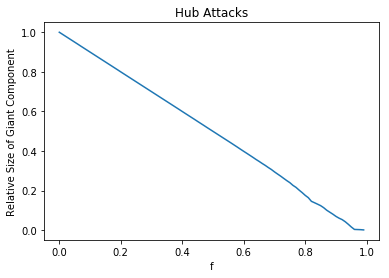

In [0]:
x2= f_values
y2= relative_sizes
plt.plot(x2,y2)
plt.title("Hub Attacks")
plt.xlabel("f")
plt.ylabel("Relative Size of Giant Component")
plt.show

##Betweenness Attacks

In [0]:
relative_sizes=[]
f_values=[]
n=100
for i in range(n):
  f=(1/n)*i
  G2= G.copy()
  sample = math.floor(f*number_nodes)  
  best_betweeness= sorted(nodes_betweenness_dict.items(), key=itemgetter(1), reverse=True)
  nodes_to_remove=[n for n,b in best_betweeness[:sample]]  
  G2.remove_nodes_from(nodes_to_remove)  
  G2max= max(nx.connected_component_subgraphs(G2), key=len)
  relative_new_giant_size= nx.number_of_nodes(G2max)/original_giant_size
  relative_sizes.append(relative_new_giant_size)
  f_values.append(f)

<function matplotlib.pyplot.show>

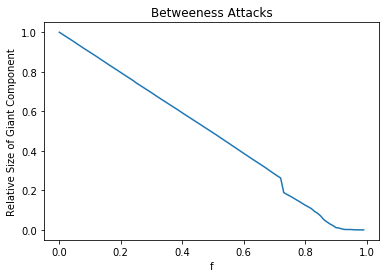

In [0]:
x3= f_values
y3= relative_sizes
plt.plot(x3,y3)
plt.title("Betweeness Attacks")
plt.xlabel("f")
plt.ylabel("Relative Size of Giant Component")
plt.show

##Closeness Attacks

In [0]:
relative_sizes=[]
f_values=[]
n=100
for i in range(n):
  f=(1/n)*i  
  G2= G.copy()
  sample = math.floor(f*number_nodes)
  best_closeness= sorted(nodes_closeness_dict.items(), key=itemgetter(1), reverse=True)
  nodes_to_remove=[n for n,c in best_closeness[:sample]]  
  G2.remove_nodes_from(nodes_to_remove)  
  G2max= max(nx.connected_component_subgraphs(G2), key=len)
  relative_new_giant_size= nx.number_of_nodes(G2max)/original_giant_size  
  relative_sizes.append(relative_new_giant_size)
  f_values.append(f)
  

<function matplotlib.pyplot.show>

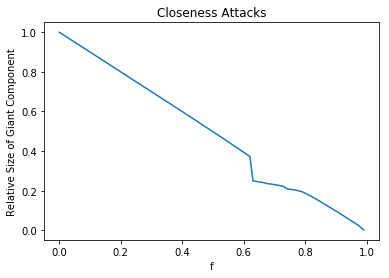

In [0]:
x4= f_values
y4= relative_sizes
plt.plot(x4,y4)
plt.title("Closeness Attacks")
plt.xlabel("f")
plt.ylabel("Relative Size of Giant Component")
plt.show

##Comparing the 4 types of Attacks

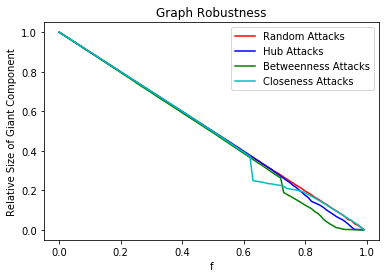

In [0]:
plt.plot(x1,y1, '-r',label='Random Attacks')
plt.plot(x2,y2, '-b', label='Hub Attacks')
plt.plot(x3,y3, '-g', label='Betweenness Attacks')
plt.plot(x4,y4, '-c',label='Closeness Attacks')

plt.title("Graph Robustness")
plt.xlabel("f")
plt.ylabel("Relative Size of Giant Component")
plt.legend()
plt.show()

##Comparing attacks in terms of shortest path

In [0]:
f_values=[]
shortest_paths=[]
n=10
for i in range(n):
  f=(1/n)*i  
  G2= G.copy()
  sample = math.floor(f*number_nodes)
  nodes_to_remove = random.sample(G2.nodes(), sample)  
  G2.remove_nodes_from(nodes_to_remove)  
  G2max= max(nx.connected_component_subgraphs(G2), key=len)  
  shortest_path=round(nx.average_shortest_path_length(G2max),4)
  print("shortest_path: ", shortest_path)
  shortest_paths.append(shortest_path)
  f_values.append(f)

shortest_path:  3.0397
shortest_path:  3.0561
shortest_path:  3.0461
shortest_path:  3.1144
shortest_path:  3.1353
shortest_path:  3.2151
shortest_path:  3.2609
shortest_path:  3.3288
shortest_path:  3.5875
shortest_path:  3.8759


<function matplotlib.pyplot.show>

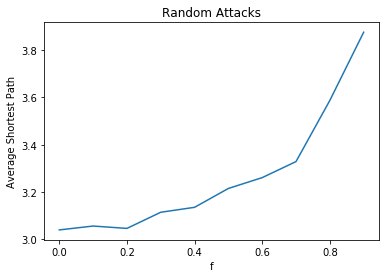

In [0]:
x1= f_values
b1=shortest_paths
plt.plot(x1,b1)
plt.title("Random Attacks")
plt.xlabel("f")
plt.ylabel("Average Shortest Path")
plt.show

In [0]:
f_values=[]
shortest_paths=[]
n=10
for i in range(n):
  f=(1/n)*i  
  G2= G.copy()
  sample = math.floor(f*number_nodes)  
  degree_sequence = sorted(G2.degree(),key=itemgetter(1), reverse=True)  
  nodes_to_remove=[n for n,d in degree_sequence[:sample]]
  G2.remove_nodes_from(nodes_to_remove)  
  G2max= max(nx.connected_component_subgraphs(G2), key=len)  
  shortest_path=round(nx.average_shortest_path_length(G2max),4)
  print("shortest_path: ", shortest_path)
  shortest_paths.append(shortest_path)
  f_values.append(f)

shortest_path:  3.0397
shortest_path:  3.2301
shortest_path:  3.4547
shortest_path:  3.7041
shortest_path:  4.0024
shortest_path:  4.3827
shortest_path:  4.8003
shortest_path:  5.6257
shortest_path:  6.7565
shortest_path:  8.1495


<function matplotlib.pyplot.show>

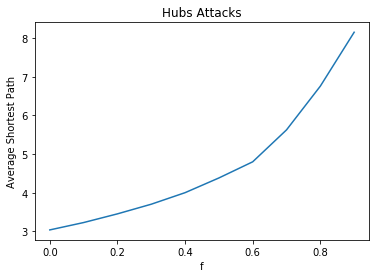

In [0]:
x2,b2= f_values,shortest_paths
plt.plot(x2,b2)
plt.title("Hubs Attacks")
plt.xlabel("f")
plt.ylabel("Average Shortest Path")
plt.show

In [0]:
f_values=[]
shortest_paths=[]
n=10
for i in range(n):
  f=(1/n)*i  
  G2= G.copy()
  sample = math.floor(f*number_nodes)
  best_betweeness= sorted(nodes_betweenness_dict.items(), key=itemgetter(1), reverse=True)
  nodes_to_remove=[n for n,b in best_betweeness[:sample]]
  G2.remove_nodes_from(nodes_to_remove)
  G2max= max(nx.connected_component_subgraphs(G2), key=len)
  shortest_path=round(nx.average_shortest_path_length(G2max),4)
  print("shortest_path: ", shortest_path)
  shortest_paths.append(shortest_path)
  f_values.append(f)

shortest_path:  3.0397
shortest_path:  3.3335
shortest_path:  3.6142
shortest_path:  3.9337
shortest_path:  4.5475
shortest_path:  5.2887
shortest_path:  6.4759
shortest_path:  8.8761
shortest_path:  5.587
shortest_path:  4.8645


<function matplotlib.pyplot.show>

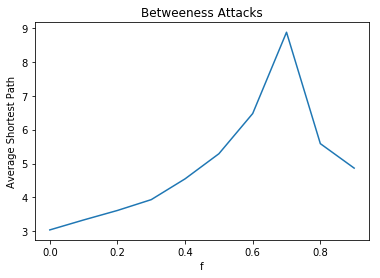

In [0]:
x3= f_values
b3=shortest_paths
plt.plot(x3,b3)
plt.title("Betweeness Attacks")
plt.xlabel("f")
plt.ylabel("Average Shortest Path")
plt.show

In [0]:
f_values=[]
shortest_paths=[]
n=10
for i in range(n):
  f=(1/n)*i  
  G2= G.copy()
  sample = math.floor(f*number_nodes)
  best_closeness= sorted(nodes_closeness_dict.items(), key=itemgetter(1), reverse=True)
  nodes_to_remove=[n for n,b in best_closeness[:sample]]
  G2.remove_nodes_from(nodes_to_remove)
  G2max= max(nx.connected_component_subgraphs(G2), key=len)
  shortest_path=round(nx.average_shortest_path_length(G2max),4)
  print("shortest_path: ", shortest_path)
  shortest_paths.append(shortest_path)
  f_values.append(f)

shortest_path:  3.0397
shortest_path:  3.3419
shortest_path:  3.686
shortest_path:  4.0293
shortest_path:  4.3474
shortest_path:  4.9449
shortest_path:  5.6718
shortest_path:  3.1319
shortest_path:  2.603
shortest_path:  2.3928


<function matplotlib.pyplot.show>

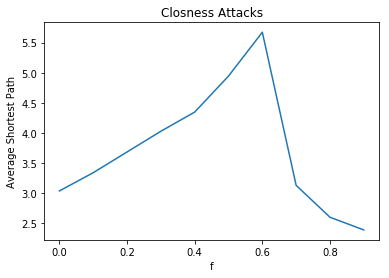

In [0]:
x4= f_values
b4=shortest_paths
plt.plot(x4,b4)
plt.title("Closness Attacks")
plt.xlabel("f")
plt.ylabel("Average Shortest Path")
plt.show

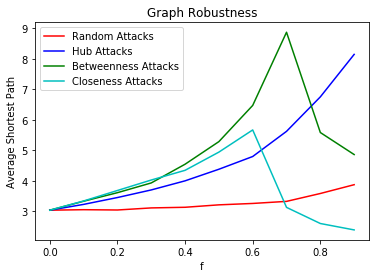

In [0]:
plt.plot(x1,b1, '-r',label='Random Attacks')
plt.plot(x2,b2, '-b', label='Hub Attacks')
plt.plot(x3,b3, '-g', label='Betweenness Attacks')
plt.plot(x4,b4, '-c',label='Closeness Attacks')

plt.title("Graph Robustness")
plt.xlabel("f")
plt.ylabel("Average Shortest Path")
plt.legend()
plt.show()

##Analysing integrity of the graph from betweenness attacks

In [0]:
f_values=[]
nComponents=[]

n=10
for i in range(n):
  f=(1/n)*i  
  G2= G.copy()
  sample = math.floor(f*number_nodes)
  
  best_betweeness= sorted(nodes_betweenness_dict.items(), key=itemgetter(1), reverse=True)
  nodes_to_remove=[n for n,b in best_betweeness[:sample]]
  
  G2.remove_nodes_from(nodes_to_remove)
  
  components = len(list(nx.connected_component_subgraphs(G2)))  
  nComponents.append(components)
  f_values.append(f)


<function matplotlib.pyplot.show>

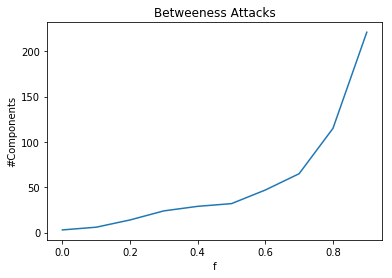

In [0]:
x3= f_values
#y3= relative_sizes
c3=nComponents

plt.plot(x3,c3)
plt.title("Betweeness Attacks")
plt.xlabel("f")
plt.ylabel("#Components")
plt.show

In [0]:
plt.plot(x1,b1, '-b',label='Random Attacks')
plt.plot(x2,b2, '-r', label='Hub Attacks')
plt.plot(x3,b3, '-g', label='Betweenness Attacks')
plt.plot(x4,b4, '-c',label='Closeness Attacks')

plt.title("Graph Robustness")
plt.xlabel("f")
plt.ylabel("Average Shortest Path")
plt.show

#Creating the Graph as playersGraph

In [0]:
import pickle
with open ('/content/drive/My Drive/outfile', 'rb') as fp:
    itemlist = pickle.load(fp)

In [0]:
len(itemlist)

14523

In [0]:
#Finding out players without teams
count=0
for i in range(int(len(itemlist)/3)):
  if len(itemlist[i*3+1]) == 0:
    print(itemlist[i*3])
    count+=1
    print(count)


Batista (footballer, born 1995)
1
Carlo Ceresoli
2
Romano Fogli
3
Mario Genta
4
Adriano Lombardi
5
Carlo Mazzone
6
Renato Olmi
7
Marcelo Pagani
8
Oronzo Pugliese
9
Francesco Rizzo (footballer)
10
Stefano Cugurra Teco
11
Łukasz Teodorczyk
12


In [0]:
playersGraph=nx.Graph()

#Adding nodes: Players
players=[]
for i in range(int(len(itemlist)/3)):
  
  players.append(itemlist[i*3])
  if len(itemlist[i*3+1]) == 0:
    continue #skipping players without teams
  playersGraph.add_node(itemlist[i*3])

In [0]:
def common_data(teams1, teams2, years1, years2): 
    result = 0
  
    # traverse in the 1st list 
    for t1, y1 in zip(teams1, years1):
  
        # traverse in the 2nd list 
        for t2, y2 in zip(teams2,years2): 
    
            # if one common 
            if t1 == t2:
              if (y2[0]<=y1[0] and y2[1]>=y1[0]) or (y2[0]>=y1[0] and y2[0]<=y1[1]):
                result+=1
                break
                  
    return result 

In [0]:
#cleaning spaces and undesired word from the lists of teams
for i in range(int(len(itemlist)/3)):
  for j in range(len(itemlist[(i*3)+2])):
    itemlist[(i*3)+2][j]=itemlist[(i*3)+2][j].replace('\n→ ','').replace(' (loan)','').strip()
  

In [0]:
#standarizing years played in each team for each player
for i in range(int(len(itemlist)/3)):
  for j in range(len(itemlist[i*3+1])):
    try:
      a= itemlist[i*3+1][j].split('–')
      if len(a)>1:
        if a[1]=="":
          itemlist[i*3+1][j]=[int(a[0]),2019]
          continue
        if len(a[1])>4:
          a[1]=a[1][:4]
        itemlist[i*3+1][j]=list(map(int,a))
      else:
        itemlist[i*3+1][j]=[int(a[0]),int(a[0])]
    except:
      itemlist[i*3+1][j]=[5000,4999]#random big values
      
      
  

In [0]:
#Adding edges: Players in the same team

for i in range(int(len(itemlist)/3)):
  for j in range(i+1,int(len(itemlist)/3)):
    if common_data(itemlist[i*3+2],itemlist[j*3+2], itemlist[i*3+1],itemlist[j*3+1])>0:
      playersGraph.add_edges_from([(players[i],players[j])])

In [0]:
print("Nodes:",len(list(playersGraph.nodes())),list(playersGraph.nodes())[0:10])
print("Edges:",len(list(playersGraph.edges())),list(playersGraph.edges())[0:10])

Nodes: 4829 ['Mika Aaltonen', 'Rolando Aarons', 'Roberto Aballay', 'Beniamino Abate', 'Ignazio Abate', 'Julio Abbadie', 'Matteo Abbate', 'Christian Abbiati', 'Alessandro Abbondanza', 'Elvis Abbruscato']
Edges: 371611 [('Mika Aaltonen', 'Angelo Alessio'), ('Mika Aaltonen', 'Alessandro Altobelli'), ('Mika Aaltonen', 'Giuseppe Baresi'), ('Mika Aaltonen', 'Massimo Beghetto'), ('Mika Aaltonen', 'Giuseppe Bergomi'), ('Mika Aaltonen', 'Nicola Berti'), ('Mika Aaltonen', 'Alessandro Bianchi (footballer, born 1966)'), ('Mika Aaltonen', 'Ivano Bonetti'), ('Mika Aaltonen', 'Massimo Bonini'), ('Mika Aaltonen', 'Antonio Cabrini')]


In [0]:
to_del = [n for n in playersGraph if playersGraph.degree(n) < 1]
playersGraph.remove_nodes_from(to_del)

In [0]:
with open('/content/drive/My Drive/graphPickle', 'wb') as fp:
    pickle.dump(playersGraph, fp)

###Exploring the graph

In [0]:
wat = [n for n in playersGraph if playersGraph.degree(n)>700
      ]

In [0]:
wat

['Marco Borriello', 'Matteo Brighi', 'Ferdinando Coppola']

In [0]:
query="Aleandro Rosi"
x= itemlist.index(query)
itemlist[x+1]

[[2004, 2012],
 [2007, 2008],
 [2008, 2009],
 [2009, 2010],
 [2012, 2014],
 [2014, 2014],
 [2014, 2018],
 [2015, 2015],
 [2015, 2016],
 [2016, 2017],
 [2019, 2019]]